## Notebook 2: Visualizing data
___

#### Please upload your completed notebook to Canvas as an .ipynb file
#### Title the file as: LastName_notebook2.ipynb

### Original work statement:

Please write your name and the names of your collaborators in this cell.

Please be sure to cite sources along the way as appropriate.

### Your name:
#### Collaborators:

You can edit this notebook directly by adding code and text cells as needed. As always, begin by importing the necessary packages.
___

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import constants, units

# Problem 1: The Hertzsprung-Russell diagram (H-R diagram)
*This problem is from the course textbook: Intro to Machnine Learning for Physics and Astronomy by Viviana Acquaviva*

The H-R diagram is a visual map that relates stellar brightness to stellar temperature or stellar color. We describe it as a map because a star will move within the H-R diagram within its lifetime depending on its life stage. We will be creating an H-R diagram in this problem.

## 1a. Import the data from the file HIP_star.dat

You can read about the data here:
https://astrostatistics.psu.edu/datasets/HIP_star.html

The file has 9 columns, but we are only interested in three columns:
- Vmag, the apparent visual magnitude of the star. This is the second column.
- Plx, the parallax angle of the star in milliarcseconds ($10^{-3}$arcseconds). This is the 5th column.
- B-V, the color of the star. This is the 9th column.
You will want to skip the first row when opening the file.



In [ ]:
star_data = np.loadtxt('HIP_star.dat', skiprows=1, usecols=(1,4,8))
star_data[0] # just to look at some values

array([ 9.27 , 21.9  ,  0.999])

In [ ]:
star_data.shape # just to look at the dimensions

(2678, 3)

## 1b. Create three variables:
- one to store Vmag
- one to store Plx
- one to store B-V

In [ ]:
Vmag = star_data[:,0]
Plx  = star_data[:,1]
B_V  = star_data[:,2]

i. How many stars are in this data set?

In [ ]:
star_data.shape[0]

2678

## 1c. plot a histogram of B-V
i. What can you say about the distribution of B-V?

ii. Calculate its mean, median and standard deviation

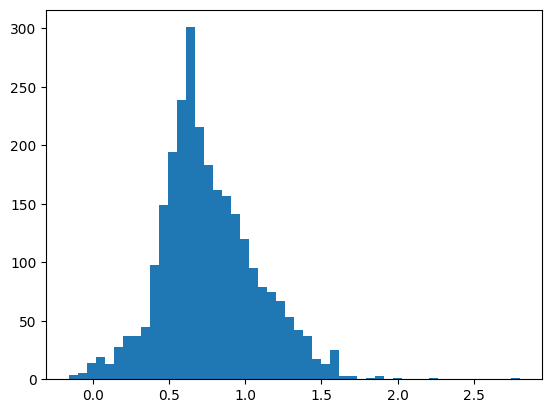

In [ ]:
plt.hist(B_V, bins=50);

**ANSWER:** The distribution is similar to a steep normal distribution centered ~0.6. The steepness on one side suggests it may be a poisson distribution.

In [ ]:
print('median', np.median(B_V))
print('mean', B_V.mean())
print('std', B_V.std())

median 0.7104999999999999
mean 0.7615298730395818
std 0.31812819990080615


## 1d. Define a function that calculates the log base 10 of the Luminosity of the star.

The log Luminosity of a star is related to its apparent magnitude (brightness) and its distance away from us by the following equation:

$$ {\rm log}L = \frac{15 - {\rm m} -5{\rm log(\theta)}}{2.5}$$
where m is the apparent visual magnitude, $\theta$ is the parallax angle which is inversely related to distance, and log is log base 10. The units of luminosity here is solar luminosity, $[L_{\odot}]$ where log$L_{\odot}$ of our sun is =0.

In [ ]:
def logL(mag, plx):
  '''
  This function calculates the log Luminosity of a star in units of solar luminosity.

  parameters:
  -----------
  mag: (float, the apparent magnitude of the star)
  plx: (float, the parallax angle of the star in milliarcseconds)

  returns:
  --------
  log luminosity (float, in solar luminosities)
  '''
  return (15-mag-5*np.log10(plx))/2.5

## 1e. Make the H-R diagram.
Create a scatter plot with B-V on the x-axis and their log luminosity on the y-axis. This is called a H-R diagram (Hertzsprung-Russell diagram). It encodes information about the temperature of stars (expressed by color, or B-V) and their luminosity.

Don't forget to label your axes as appropriate.

Adjust axes limits to be [-0.5,3] for B-V, [-3, 4] for log L

In [ ]:
log_Lum = logL(Vmag, Plx)

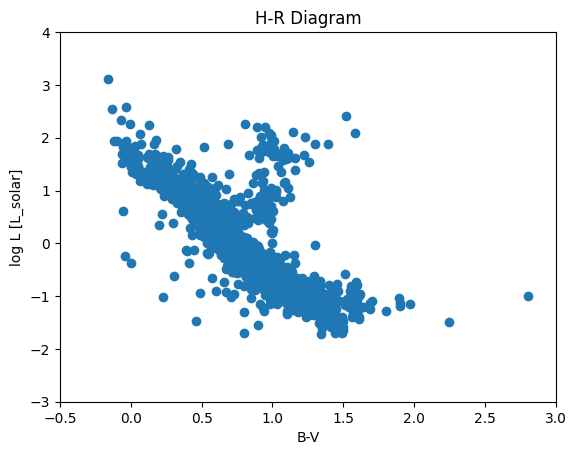

In [ ]:
plt.scatter(B_V, log_Lum)
plt.xlim(-0.5, 3)
plt.ylim(-3, 4)
plt.xlabel('B-V')
plt.ylabel('log L [L_solar]')
plt.title('H-R Diagram');

## 1f. Incorporate apparent magnitude information.
Make another scatter plot, this time with colors arranged according to apparent magnitude of the star, and where the size of the markers is also proportional to the brightness of each star.

Include a colorbar. Remember, you will want to choose a colormap! Scroll here to find them: https://matplotlib.org/stable/users/explain/colors/colormaps.html


In [ ]:
#Apparent magnitude values increase as brightness decreases
#So I will order all of my arrays with respect to magnitude
#Then I will reverse the order of the magnitudes for the size parameter in the plot script
#This way my brightest star (lowest magnitude) has the largest size

sort_inds = np.argsort(Vmag)
BV_sort = B_V[sort_inds]
L_sort = log_Lum[sort_inds]
Vmag_sort = Vmag[sort_inds]
brightness_sizes = Vmag_sort[::-1]

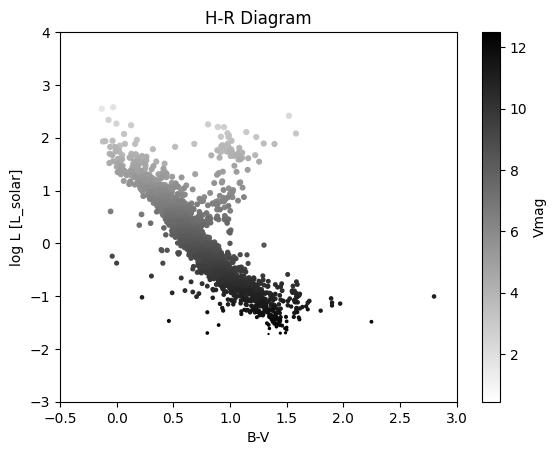

In [ ]:
plt.scatter(BV_sort, L_sort, c=Vmag_sort, s=brightness_sizes, cmap='binary')
plt.xlim(-0.5, 3)
plt.ylim(-3, 4)
plt.xlabel('B-V')
plt.ylabel('log L [L_solar]')
plt.title('H-R Diagram')
plt.colorbar(label='Vmag');

## 1g. What trends do you notice in the H-R diagram?
Important note: Stellar color is a proxy for temperature. An H-R diagram that shows temperature on the x-axis has temperature in descending order going (left to right) from hotter-->cooler stars. Using color as a proxy, more blue stars (stars that have B-V < 0) are hotter than red stars (stars that have B-V > 0).

**ANSWER:** Stars on the main sequence that appear more red  are cooler, less luminous and less bright than blue stars. Stars on the red giant branch are very bright.




# Problem 2: Creating a mock data set
One of the most powerful tools in reserach is creating a mock dataset that is based on known physical processes. In this problem, we're going to create a mock set of stellar parallaxes in order to obtain their distances.

The formula for obtaining distance to stars through parallax is:
$$ D = \frac{57.3^{\circ} \times 1 {\rm AU}}{\theta}$$

where D is the distance to the star (typically expressed in units of parsecs), 1AU is the radius of our observer base here on Earth (recall from class), and $\theta$ is the parallax angle in *degrees*. (In case it's hard to see, that says 57.3 degrees)

## 2a. Plot a histogram of the parallax angles from the data set in Problem 1.
In order to create a statistical data set of parallaxes, we want to look at the statistical distribution of known parallaxes. So we can look at the histogram of parallaxes from real data in order to make decisions.

i. What is the range of the parallaxes (in milliarcseconds)?
ii. What shape does the distribution have? What are the most/least frequent occurrences? Is there a trend?


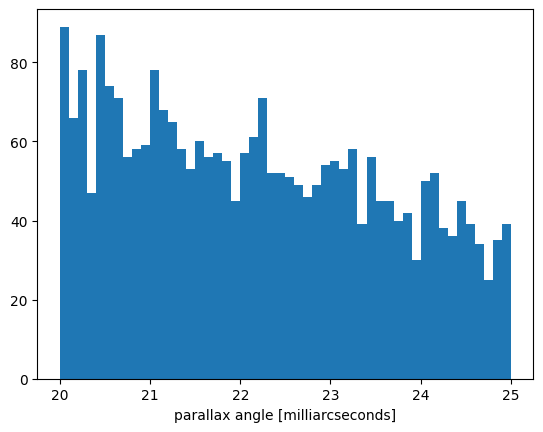

In [ ]:
plt.hist(Plx, bins=50)
plt.xlabel('parallax angle [milliarcseconds]');

**ANSWER:**

i. The parallax angles range from 20 milliarcseconds to 25 milliarcseconds

ii. We see a nearly uniform distribution, but there is clearly a slope in the distribution where number of stars decrease as parallax angle increases.



## 2b. Create an array to store 1000 mock stellar parallaxes with a similar distribution as the real parallaxes.
Be sure to plot the histogram of the mock distrbution to check your results.

** Please, don't take too long on this. If you get stuck here, you can just randomly sample 1000 data points from the real data set in Problem 1. (you can look at numpy random.choice)

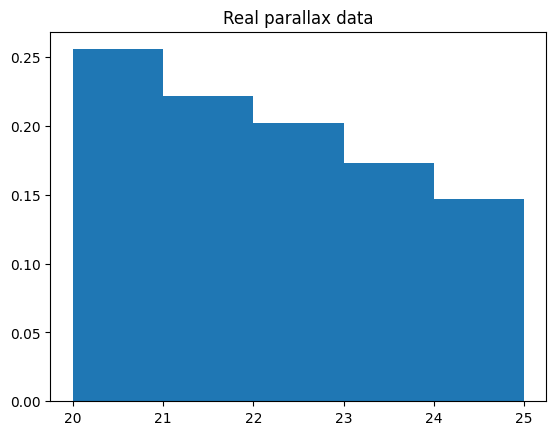

In [ ]:
### I'm going to take the PDF of the real data in 5 bins.
### The plan is to create 5 empty bins that span one milliarcsecond each,
### get the number of points that should be in each bin
### and fill each bin with that many random selections within the parallax range of the bin

### First I create a variable to store the PDF of the data set with only 5 bins
pdf = plt.hist(Plx, bins=5, density=True)[0]
plt.title('Real parallax data');

In [ ]:
# The PDF is in fractional form so I'll multiply by 100 and turn to integers
num_each_bin = (1000*pdf).astype(int)
num_each_bin

array([255, 222, 202, 172, 146])

In [ ]:
#let's see how many there are total, we need 100
num_each_bin.sum()

np.int64(997)

In [ ]:
#ok we need 3 more
#since the first bin has the greatest frequancy I'll add 3 to the first index
num_each_bin[0] = num_each_bin[0]+3
num_each_bin

array([258, 222, 202, 172, 146])

In [ ]:
num_each_bin.sum()

np.int64(1000)

In [ ]:
#I'm going to make a function to do this since I'll do this 5 times
def fill_bin(Low, High, ind):
  np.random.seed(10)
  return np.random.uniform(low=Low, high=High, size=num_each_bin[ind])

In [ ]:
bin_1 = fill_bin(20,21,0)
bin_2 = fill_bin(21,22,1)
bin_3 = fill_bin(22,23,2)
bin_4 = fill_bin(23,24,3)
bin_5 = fill_bin(24,25,4)

plx_mock = np.concatenate([bin_1, bin_2, bin_3, bin_4, bin_5])

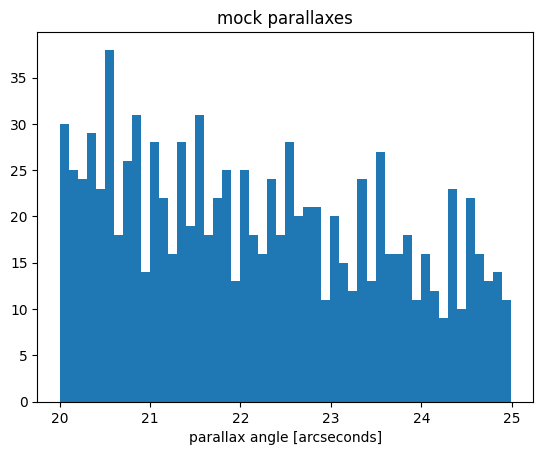

In [ ]:
#check the distribution to make sure it's close to the real one
plt.hist(plx_mock, bins=50)
plt.title('mock parallaxes')
plt.xlabel('parallax angle [arcseconds]');

## 2c. get the distance, in parsecs, to the mock stars from your mock parallax
You may want to use astropy for your units inside your function. Convert the output to parsecs before using the .value attribute! We don't want to output the unit itself!

In [ ]:
def distance(theta):
  '''
  This function takes stellar parallax as input to calculate a distance in parsecs and returns its value.

  parameters:
  ----------
  theta: (float, the parallax measure in milliarcseconds)

  returns: (float, the value of distance measured in parsecs)
  '''
  ### the baseline of observation is 1 AU
  baseline = 1*units.AU

  ### our angles will be given in milliarcseconds, then let's convert to degree
  angle    = (theta*1e-3*units.arcsec).to(units.degree)

  ### the formula
  D = baseline*57.3*units.degree/angle

  ### return the value of what the measure is in parsecs
  return D.to(units.parsec).value

In [ ]:
dist_parallax = distance(plx_mock)

## 2d. Create an array of mock errors on the measurement.
Think about what might be a source of error and how that might present in your measurments. Let's imagine that our instrument is more precise with larger parallaxes. Therefore creata a mock array of errors on the stars where the smaller the parallax angle, the higher the error.

In [ ]:
### let's make an array of small uniformly random errors between 0 to 30%
### the errors may vary, but they won't vary by much with my hypothetical instrument
err_initial = np.random.uniform(0.02,0.1, 1000)

### sort the initial errors from least to greatest
err_sort = np.sort(err_initial)

### and then reverse the order so that we can match the greatest error to the smallest parallax
err_final = err_sort[::-1]

In [ ]:
### now let's get the indices of our parallaxes sorted from least to greatest
plx_sort_inds = np.argsort(plx_mock)

### and let's sort our mock parallax with reverse of these indeces to multiply with the err_sort
### this will give us an ordered error value for each point
plx_mock_sort      = plx_mock[plx_sort_inds]
err_mock = err_final*plx_mock_sort

#let's check the first and last element
print(err_mock[0], err_mock[-1])

1.9982169760862307 0.5032700657209965


## 2e. Make a plot of the mock distances as a function of mock parallax with the error bars as a shaded region behind the line plot (CHALLENGE, I believe in you!)

Don't forget to label your axes and provide units as appropriate.

In [ ]:
#let's remember to sort our disatnces since we sorted everything else
dist_parallax_sort = dist_parallax[plx_sort_inds]

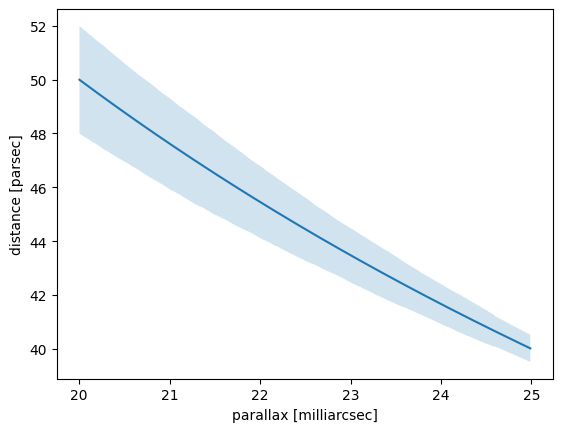

In [ ]:
fig, ax = plt.subplots()
ax.plot(plx_mock_sort, dist_parallax_sort)
ax.fill_between(plx_mock_sort, dist_parallax_sort - err_mock, dist_parallax_sort + err_mock, alpha=0.2)
ax.set_xlabel('parallax [milliarcsec]')
ax.set_ylabel('distance [parsec]');

## 2f. Does your plot make sense? Explain.

**ANSWER:** We see that as parallax angle increases, distance to the star decreases. This makes sense since the farther stars are away the less we notice their "shift" against background stars. Also, our shaded region shows that there is greater error on the stars that are farthest away.  